# Linear regression with one variable

***Maciej Górnik
nr albumu: 402325
grupa: 1b
AiR, EAIiIB
semestr 6***

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [45]:
# Ex. 1. Use the head and describe function to examine the data and display few columns.
data.head(5)
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


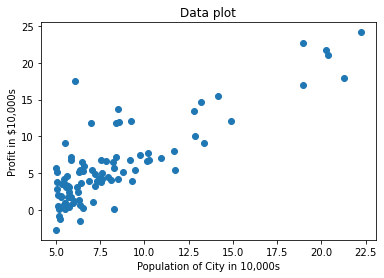

In [46]:
# Ex. 2. Plot and analyze the data, where: x - population, y - profit.
plt.plot(data['Population'],data['Profit'],'o')
plt.title("Data plot")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

In [47]:
# Ex. 3. In order to make this cost function work we need to insert a column of 1s at the beginning of the data frame.
if "cost" not in data:
  data.insert(0,"cost",1)
data.head(5)



,cost,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [48]:
# Ex 4. We need to separate our data into independent variables X (column 0,1) and our dependent variable y (col. 2).
# Check with the head function if your implementation is correct:
X_pd = data.iloc[:, [0,1]]
y_pd = data.iloc[:,[2]]

print(X_pd.head(5))
print(y_pd.head(5))

   cost  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598
    Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233


In [49]:
X = np.matrix(X_pd.values)
y = np.matrix(y_pd.values)
theta = np.zeros((X.shape[1],1))

In [50]:
# Ex. 5 The cost function evaluates the quality of our model by calculating the error between our model’s 
# prediction for a data point, using the model parameters, and the actual data point. 
# Please write the cost function based on X, y and parameter θ.
def computeCost(X, y, theta):
  h = np.matmul(X,theta)
  J = 1/(2*len(y)) * np.sum(np.square(h - y))
  return J

# Ex. 6 Test the cost function with (θ = 0).
computeCost(X,y,theta)

32.072733877455676

In [51]:
#Ex. 7 Please implement the gradient descent algorithm:
def simple_gradient(X, y, theta, alpha, it):
    # it - iteration nb.
    cost = []
    for i in range(it):
        h = np.matmul(X,theta)
        theta = theta - (1/len(y)) * alpha * np.transpose(X) * (h - y)
        cost.append(computeCost(X,y,theta))
    return theta, cost

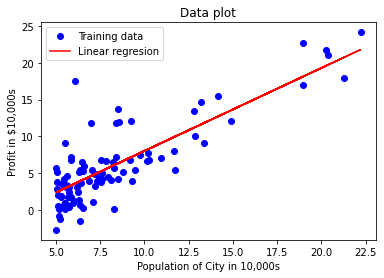

In [52]:
# Ex. 8 Please calculate the optimal parameters for the dataset.
# Ex. 9 Please calculate the cost function for the given (zad.8) θ.

X = np.matrix(X_pd.values)
y = np.matrix(y_pd.values)
theta = np.zeros((X.shape[1],1))
alpha = 0.01
it = 1000
th,cost = simple_gradient(X, y, theta, alpha, it)

# Ex. 10 Plot the regression function and our dataset.
lin_regr = [th[1,0]*x_i + th[0,0] for x_i in data['Population']]
plt.plot(data['Population'],data['Profit'],'bo',data['Population'],lin_regr,'r-')
plt.title("Data plot")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend(["Training data", "Linear regresion"])
plt.show()

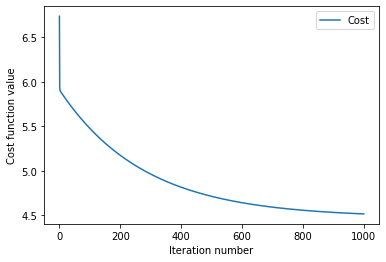

In [53]:
# Ex. 11 Plot the relationship between the cost function and number of iterations.
iters = np.linspace(0,it,1000)
plt.plot(iters,cost)
plt.xlabel("Iteration number")
plt.ylabel("Cost function value")
plt.legend(["Cost"])
plt.show()

# Linear regression with multiple variables

In [54]:
import numpy as np
from sklearn import datasets, linear_model
 
# Data import
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [55]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


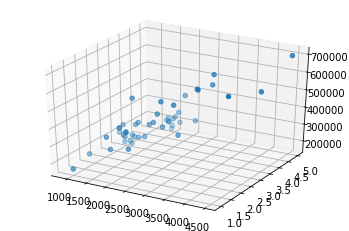

In [56]:
#3D Plot
ax = plt.axes(projection ='3d') 
ax.scatter(data2.Size, data2.Bedrooms, data2.Price)

In [57]:
# Ex. 1. Notice that the scale of the values for each variable is vastly different. 
# A house will typically have 2-5 bedrooms but may have anywhere from hundreds to 
# thousands of square feet. To fix this, we need to do something called “feature normalization”. 
# One way to do this is by subtracting from each value in a feature the mean of that feature, 
# and then dividing by the standard deviation (2 lines of code).

# Normalization
for col in data2:
  data2[col] = np.divide(np.subtract(data2[col],data2[col].mean()),data2[col].std())

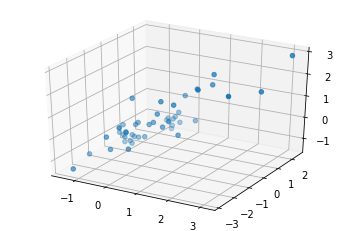

In [58]:
#3D Plot after normalization
ax = plt.axes(projection ='3d') 
ax.scatter(data2.Size, data2.Bedrooms, data2.Price)

In [59]:
# Ex.2 Please perform steps 3-11 from the previous task by using the same functions.

if "Ones" not in data2:
  data2.insert(0,"Ones",1)
data2.head(5)

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [60]:
X2_pd = data2.iloc[:, [0,1,2]]
y2_pd = data2.iloc[:,[3]]

print(X2_pd.head())
print(y2_pd.head())

   Ones      Size  Bedrooms
0     1  0.130010 -0.223675
1     1 -0.504190 -0.223675
2     1  0.502476 -0.223675
3     1 -0.735723 -1.537767
4     1  1.257476  1.090417
      Price
0  0.475747
1 -0.084074
2  0.228626
3 -0.867025
4  1.595389


In [61]:
X2 = np.matrix(X2_pd.values)
y2 = np.matrix(y2_pd.values)
theta2 = np.zeros((X2.shape[1],1))

In [62]:
computeCost(X2, y2, theta2)

0.4893617021276596

In [63]:
alpha = 0.01
it = 1000
th2,cost2 = simple_gradient(X2, y2, theta2, alpha, it)
print(th2)

[[-1.10937599e-16]
 [ 8.78503652e-01]
 [-4.69166570e-02]]


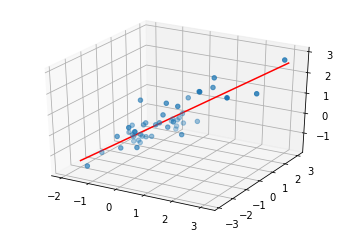

In [64]:
x_lin_reg = np.arange(-2, 4)
y_lin_reg = np.arange(-2, 4)
lin_regr2 = th2.flat[0] + th2.flat[1] * x_lin_reg + th2.flat[2] * y_lin_reg

ax = plt.axes(projection ='3d')  
ax.scatter(data2.Size, data2.Bedrooms, data2.Price)
ax.plot(x_lin_reg, y_lin_reg, lin_regr2, 'r')

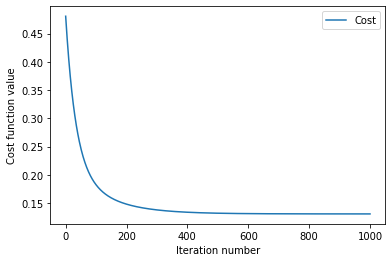

In [65]:
iters = np.linspace(0,it,1000)
plt.plot(iters,cost2)
plt.xlabel("Iteration number")
plt.ylabel("Cost function value")
plt.legend(["Cost"])
plt.show()

# Boston database

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm
 
# Regression models
# http://scikit-learn.org/stable/modules/linear_model.html
 
# Load the diabetes dataset
boston = datasets.load_boston()
# print description
print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [67]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Ex. 1. Divide the database into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(boston_X, boston_Y, test_size = 0.3)

In [68]:
# Ex. 2. According to the above example, please implement linear regression model for the dataset. 
# Please calculate the statistical metrics for the model including MSE and R2?

# Creating an object
lin_regr3 = linear_model.LinearRegression()

# Learning model on training data
lin_regr3.fit(X_train, Y_train)

# Predicting values using test data
Y_predicted = lin_regr3.predict(X_test)

# Regression coefficients (theta)
print('Coefficients: \n', lin_regr3.coef_)

# MSE
print(f'MSE: {mean_squared_error(Y_test, Y_predicted)}')

# R2
print(f'R2: {r2_score(Y_test, Y_predicted)}')



Coefficients: 
 [-1.47985984e-01  5.39782766e-02 -1.85258989e-02  2.60475721e+00
 -2.47482193e+01  3.61550752e+00  2.87137326e-03 -1.98653856e+00
  3.29955608e-01 -1.03900059e-02 -1.13902257e+00  1.14667358e-02
 -4.96146910e-01]
MSE: 20.193099627797565
R2: 0.7058944730484447


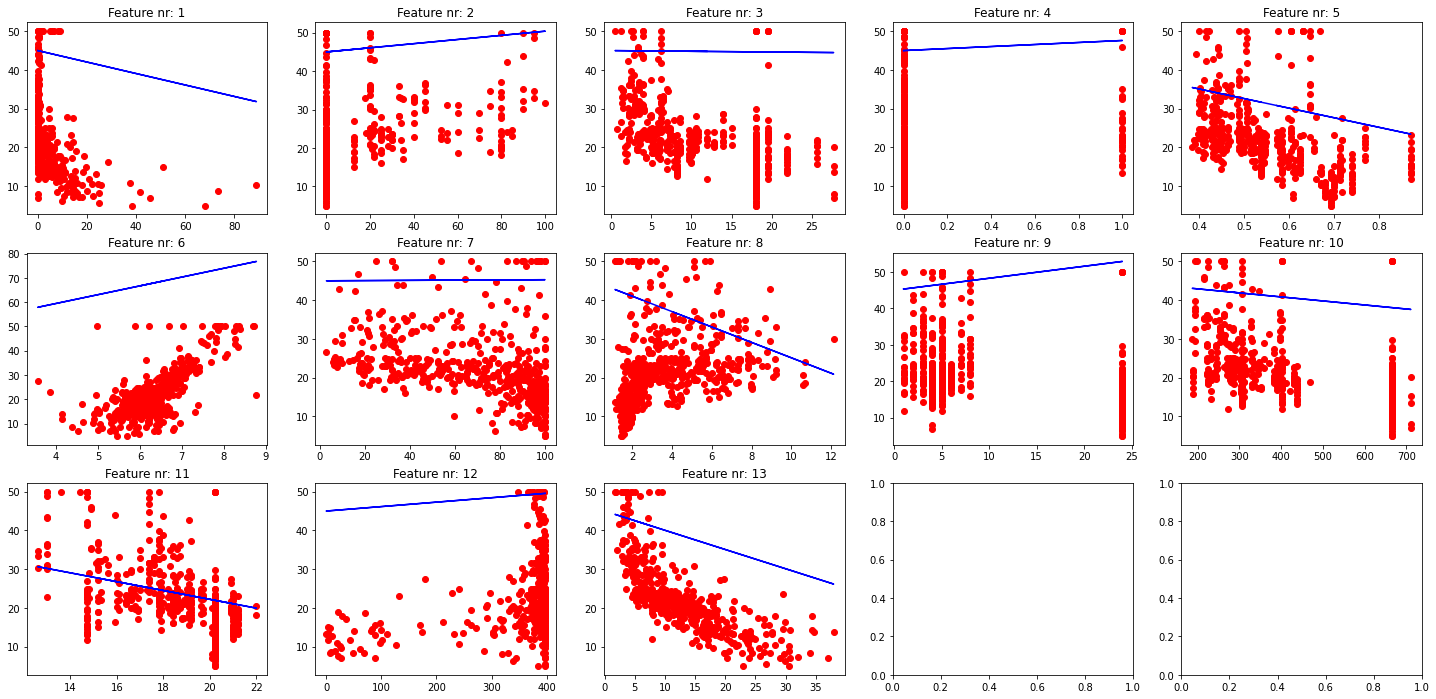

In [69]:
# Ex. 3. Plot the linear regression for each atribute in the Boston dataset. Iterative or using subplots.

fig1, ax1 = plt.subplots(3, 5)
fig1.set_size_inches(25,12)
for i, axis in enumerate(ax1.flat):
    if i < boston.data.shape[1]:
      axis.scatter(boston.data[:,i], boston.target,c= 'r')
      axis.plot(boston.data[:,i], boston.data[:,i] * lin_regr3.coef_[i] + lin_regr3.intercept_, 'b')
      axis.set_title(f'Feature nr: {i+1}')


## Additional Exercise

Text(0.5, 1.0, 'Comparison of linear regression models')

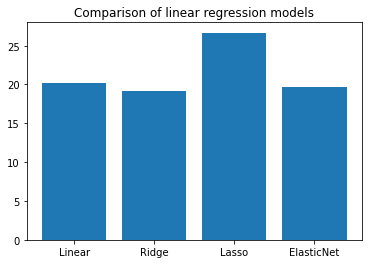

In [70]:
reg_LinReg =linm.LinearRegression()
reg_Ridge = linm.Ridge(alpha = .5)
reg_Lasso = linm.Lasso(alpha = 5.1)
reg_ElNet =linm.ElasticNet(alpha = .5, l1_ratio=0.5)


reg_LinReg.fit(X_train, Y_train)
reg_Ridge.fit(X_train, Y_train)
reg_Lasso.fit(X_train, Y_train)
reg_ElNet.fit(X_train, Y_train)

errors = []
keys = ["Linear", "Ridge", "Lasso", "ElasticNet"]
Y_pred = reg_LinReg.predict(X_test)
errors.append(mean_squared_error(Y_test, Y_pred))
Y_pred = reg_Ridge.predict(X_test)
errors.append(mean_squared_error(Y_test, Y_pred))
Y_pred = reg_Lasso.predict(X_test)
errors.append(mean_squared_error(Y_test, Y_pred))
Y_pred = reg_ElNet.predict(X_test)
errors.append(mean_squared_error(Y_test, Y_pred))

plt.bar(keys, errors)
plt.title("Comparison of linear regression models")

LinearRegression and Ridge have the lowest mean error rate, Lasso has the highest.